In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("risangbaskoro/wlasl-processed")

print("Path to dataset files:", path)

/home/tkg5kq/.conda/envs/video/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/tkg5kq/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5


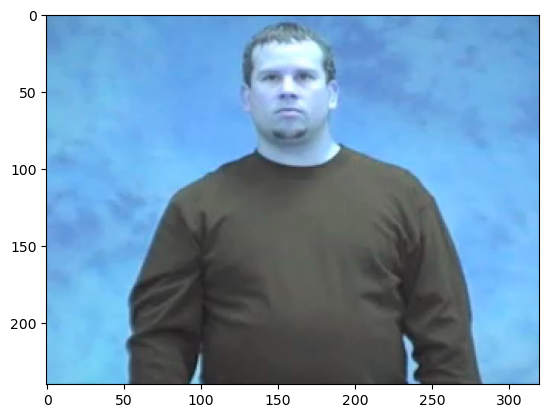

In [3]:
video_dir = '/home/tkg5kq/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5/videos/'
video = video_dir + '56811.mp4'


cap = cv2.VideoCapture(video)

while(cap.isOpened()):
    ret, frame = cap.read()
    # cv2.imshow('frame',frame)
    break

plt.figure()
# array = plt.imread(directory + IMAGE_FILES[0])
plt.imshow(frame)
# cap.release()
# cv2.destroyAllWindows()


In [4]:
import mediapipe as mp
debug = False

def mediapipe_to_numpy(landmark):
  np_arr = np.zeros(shape=(len(landmark), 3), dtype=float)
  for i, _landmark in enumerate(landmark):
    np_arr[i, 0] = _landmark.x
    np_arr[i, 1] = _landmark.y
    np_arr[i, 2] = _landmark.z
  return np_arr

def make_annotated_frame(mp_drawing, mp_drawing_styles, idx, results, image_width, image_height):
  for hand_landmarks in results.multi_hand_landmarks:
    np_arr = mediapipe_to_numpy(hand_landmarks.landmark)
    print('hand_landmarks:', hand_landmarks)
    print(
        f'Index finger tip coordinates: (',
        f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
        f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
    )
    print(type(hand_landmarks))
    print(len(hand_landmarks.landmark))
    print(len(mp_hands.HandLandmark))
    print(dir(hand_landmarks))
    print(np_arr.shape)
    # Create annotated image
    mp_drawing.draw_landmarks(
        annotated_image,
        hand_landmarks,
        mp_hands.HAND_CONNECTIONS,
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))

def get_hands(video):
  cap = cv2.VideoCapture(video)

  mp_drawing = mp.solutions.drawing_utils
  mp_drawing_styles = mp.solutions.drawing_styles
  mp_hands = mp.solutions.hands

  
  with mp_hands.Hands(
      static_image_mode=True,
      max_num_hands=2,
      min_detection_confidence=0.5) as hands:
    idx = 0
    while(cap.isOpened()):
      ret, frame = cap.read()
      
      # Read an image, flip it around y-axis for correct handedness output (see
      # above).
      # frame = cv2.imread(directory + file)
      image = cv2.flip(frame, 1)
      # Convert the BGR image to RGB before processing.
      results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      # Print handedness and draw hand landmarks on the image.
      # print('Handedness:', results.multi_handedness)
      if not results.multi_hand_landmarks:
        continue
      image_height, image_width, _ = image.shape
      annotated_image = image.copy()

      if debug:
        make_annotated_frame(mp_drawing, mp_drawing_styles, idx, results, image_width, image_height)

      cnt = 0
      for hand_world_landmarks in results.multi_hand_world_landmarks:
        np_arr = mediapipe_to_numpy(hand_world_landmarks.landmark)
        if debug:
          mp_drawing.plot_landmarks(
            hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)
        print(np_arr)
        cnt+=1
        
      idx += 1
      if idx == 1:
        break

In [5]:
# For static images:
# directory = '/home/tkg5kq/.cache/kagglehub/datasets/ayuraj/asl-dataset/versions/1/asl_dataset/a/'

video = '/home/tkg5kq/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5/videos/56811.mp4'
get_hands(video)

I0000 00:00:1733249774.432081  921274 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1733249774.497052  921464 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.54.14), renderer: NVIDIA RTX A6000/PCIe/SSE2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1733249774.567462  921418 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733249774.585796  921449 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


[[ 1.02378596e-02  4.66298908e-02  6.45369068e-02]
 [-9.87816043e-03  1.99709050e-02  5.50761148e-02]
 [-1.70401987e-02  1.35402381e-03  4.29936722e-02]
 [-2.21398436e-02 -1.01553435e-02  1.98414326e-02]
 [-2.92276368e-02 -2.41375230e-02  5.36314546e-05]
 [-7.29487091e-03 -1.89486123e-03  8.37566890e-03]
 [-1.29834861e-02 -1.47807170e-02 -5.43258106e-03]
 [-2.54498273e-02 -2.30534002e-02 -6.20983075e-03]
 [-3.68177369e-02 -1.89503487e-02 -1.05513120e-02]
 [-7.76925008e-04 -2.99321138e-04  1.42610050e-03]
 [-1.08565241e-02 -3.97607405e-03 -1.21936789e-02]
 [-3.03397514e-02  3.74590885e-03 -6.92498824e-03]
 [-4.26641107e-02  9.09454655e-03  4.40785615e-03]
 [ 4.36408911e-03  5.64227230e-04 -6.35363767e-03]
 [-5.51824505e-03  6.92459336e-03 -1.62571780e-02]
 [-1.14736408e-02  1.59769617e-02 -1.60170207e-03]
 [-1.19915623e-02  2.24664453e-02  1.79186203e-02]
 [ 5.79909422e-03  1.66852567e-02 -6.87110657e-03]
 [-1.64888892e-03  1.87440179e-02 -1.04061905e-02]
 [-7.01458566e-03  2.75693145e-

W0000 00:00:1733249776.710648  921448 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


In [1]:
from datasets.video_attr import Video_dataset
from utils.Augmentation import get_augmentation
from dotmap import DotMap
import yaml

path = '/scratch/tkg5kq/BIKE/configs/ucf101/ucf_k400_finetune.yaml'
with open(path, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
config = DotMap(config)

transform_train = get_augmentation(True, config)
transform_val = get_augmentation(False, config)
print(config.data.attributes_train_path)
train_data = Video_dataset(
        config.data.train_root, config.data.train_list,
        config.data.label_list, num_segments=config.data.num_segments,
        modality=config.data.modality,
        image_tmpl=config.data.image_tmpl, random_shift=config.data.random_shift,
        transform=transform_train, dense_sample=config.data.dense,
        select_topk_attributes=config.data.select_topk_attributes,
        attributes_path=None,
        train_video=False)

/home/tkg5kq/.local/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/sfs/gpfs/tardis/home/tkg5kq/.local/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/tkg5kq/.conda/envs/video/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DotMap()
video number:9537


In [5]:
print(train_data.video_list[0].label)
print(train_data.video_list[0].num_frames)
print(train_data.video_list[0].path)

0
119
ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01


In [20]:
# Download Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("risangbaskoro/wlasl-processed")

print("Path to dataset files:", path)

# new dataset name
org_dir = 'videos_org'
org_path = path + '/' + org_dir
directory = 'wlasl_10'
reduced_path = path + '/' + directory
videos_path = path + '/videos'

!source activate video
!python utils/reorg.py {org_dir} 10
!mkdir -p {reduced_path}
!mv {org_path}/man    {reduced_path}
!mv {org_path}/woman  {reduced_path}
!mv {org_path}/who    {reduced_path}
!mv {org_path}/cousin {reduced_path}
!mv {org_path}/help   {reduced_path}
!mv {org_path}/deaf   {reduced_path}
!mv {org_path}/thin   {reduced_path}
!mv {org_path}/no     {reduced_path}
!mv {org_path}/leave  {reduced_path}
!mv {org_path}/soon   {reduced_path}


100%|██████████| 4.82G/4.82G [00:21<00:00, 239MB/s]

Extracting files...


Path to dataset files: /home/tkg5kq/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5
/sfs/weka/scratch/tkg5kq/BIKE/utils/reorg.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  word = row[1][0]
/sfs/weka/scratch/tkg5kq/BIKE/utils/reorg.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  instance_len = len(row[1][1])
/sfs/weka/scratch/tkg5kq/BIKE/utils/reorg.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  v

In [21]:
!git clone https://github.com/whwu95/MVFNet.git
directory = 'wlasl_10'
resized_dir = path + '/resized_' + directory
frame_dir = path + '/frames_' + directory
!python MVFNet/data_process/video_resize.py {reduced_path} {resized_dir} --level 2 -se 256
!python MVFNet/data_process/video2image.py {resized_dir} {frame_dir} --level 2 --lib opencv --prefix image_%04d.jpg
!rm -rf MVFNet

Cloning into 'MVFNet'...
remote: Enumerating objects: 310, done.
remote: Counting objects: 100% (310/310), done.
remote: Compressing objects: 100% (214/214), done.
remote: Total 310 (delta 113), reused 273 (delta 87), pack-reused 0 (from 0)
Receiving objects: 100% (310/310), 20.42 MiB | 21.88 MiB/s, done.
Resolving deltas: 100% (113/113), done.
100%|█████████████████████████████████████████| 125/125 [00:06<00:00, 18.33it/s]


/home/tkg5kq/.cache/kagglehub/datasets/risangbaskoro/wlasl-processed/versions/5/resized_wlasl_10
